# Problem

As the competition of smartphones get more and more competitive each day, finding the best pricing range for a smartphone would be a key strategy to have a profitable smartphone company.

However as there are more and more smartphone it's getting harder and harder for a company to justified a price range of a phone.

if a company set a smartphone that's too expensive with low computational power nobody is going to buy it, and if a company set a smartphone price range too low based on it's computational power the smartphone company is going to lose on potential profit.

# EDA Goals

Findout what specification that affecting phone price range

What are the the specification of a phone that's affecting the price range
        
        Does Screensize matter to the price range
        
        Do the camera megapixel affecting the price of a phone
        
        How does RAM size affecting the price range


Find out what specification that affecting phone price range

What are the the specification of a phone that's affecting the price range

    Do the camera megapixel affecting the price of a phone

    How does RAM size affecting the price range

# Attributes



    In this data:

    id: ID

    battery_power: Total energy a battery can store in one time measured in mAh

    blue: Has bluetooth or not

    clock_speed: speed at which microprocessor executes instructions

    dual_sim: Has dual sim support or not

    fc: Front Camera mega pixels

    four_g: Has 4G or not

    int_memory: Internal Memory in Gigabytes

    m_dep: Mobile Depth in cm

    mobile_wt: Weight of mobile phone

    n_cores: Number of cores of processor

    pc: Primary Camera mega pixels

    px_height: Pixel Resolution Height

    px_width: Pixel Resolution Width

    ram: Random Access Memory in Megabytes

    sc_h: Screen Height of mobile in cm

    sc_w: Screen Width of mobile in cm

    talk_time: Longest time that a single battery charge will last when you are

    three_g: Has 3G or not

    touch_screen: Has touch screen or not

    wifi: Has wifi or not



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('data_mobile_price_range.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All of the column types are in int or float generally speaking if we want to use all the columns for machine learning process.

It's  ready without any encoding 

This data probably has no null values because we can see from the range index is 2000 value and all the columns have 2000 value each.

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


this dataset seems like it is of the phones before 2020 because by just looking at the battery power there's no phone above 2000 MAH

there's probaby an outlier in fc column (front camera mega pixel by looking the min and max value ) which need more investigation 

there's a phone without front camera in this dataset.

we could get a screen size by getting diagonal of phone screen height and width

the maximum ram in this phone is almost 4000 mb (4GB)

the maximum core for this phone dataset is 8 cores (octacores) and the minimum is a single core phone (1 core)

the heaviset phone is 200 gram which is normal for phone these days 

we can group the phone by screen quality by using px_height, px_weight

there's a row with 0 pixel height which is unusual not to have pixel height in a phone

there's also an unusual row value of 0 in screen width, it doesn't make sense that a phone has 0 width

# Checking the null value and the outliers of the columns

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Now we know there's no null value in the columns so we don't have to worry about dropping or filling some null values

 <b>Outlier checking with a Boxplot</b>


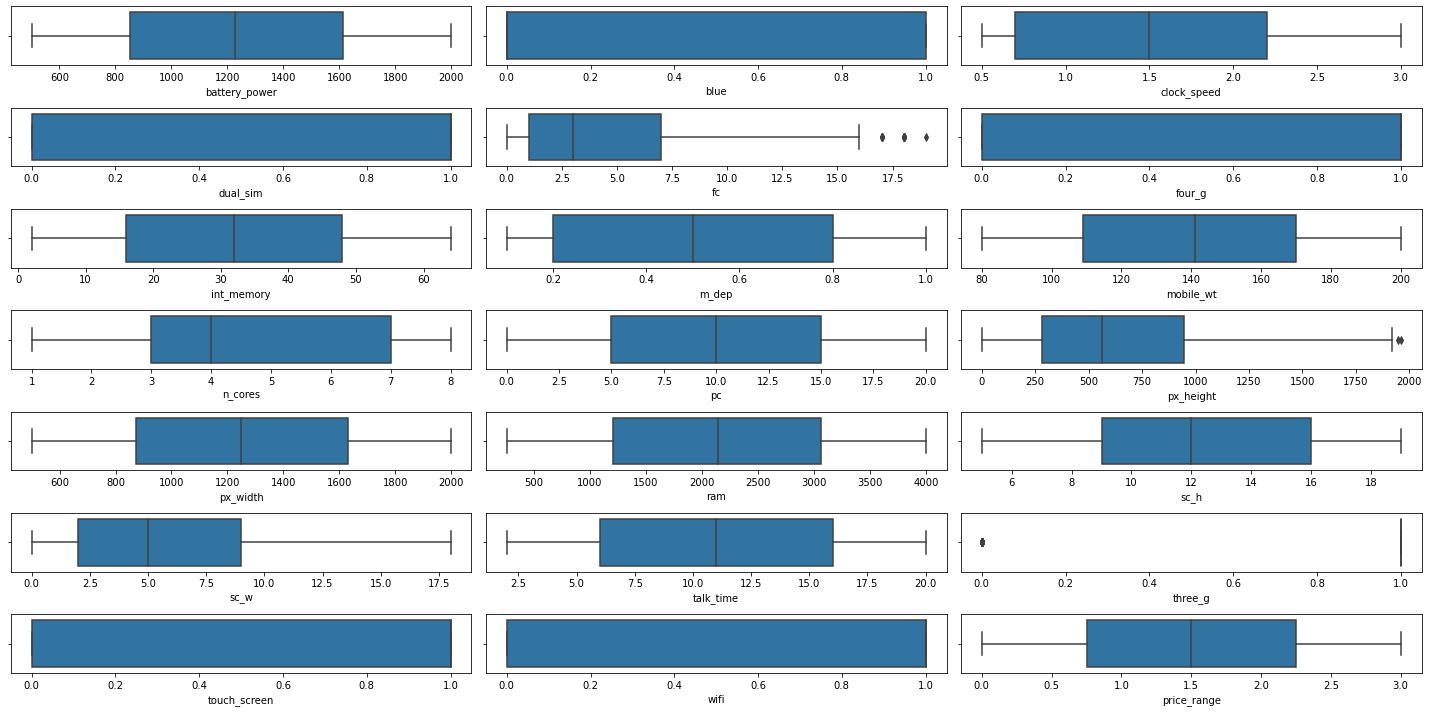

In [6]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x+= 1

plt.tight_layout()

There are outliers in the fc column as we found before while looking at the stats.

There are also outliers in the px height columns. 

we won't worry about the outliers because it seems it only small proportion of the value. We will figure out how many outliers are in those columns.

<b>Getting the number of outliers in fc column</b>

In [7]:
df_description = df.describe()
fc_Q1 =  df_description['fc']['25%']
fc_Q3 = df_description['fc']['75%']
fc_IQR = fc_Q3 - fc_Q1

up_fence = fc_Q3 + (1.5 * fc_IQR)
lo_Fence = fc_Q1 - (1.5 * fc_IQR)

fc_outliers =  df[(df['fc'] < lo_Fence) | (df['fc']> up_fence)]
fc_outliers

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


there are 18 phone that has a front camera outlier value 

In [8]:
px_height_Q1 =  df_description['px_height']['25%']
px_height_Q3 = df_description['px_height']['75%']
px_height_IQR = px_height_Q3 - px_height_Q1

up_fence_px_height = px_height_Q3 + (1.5 * px_height_IQR)
lo_Fence_px_height = px_height_Q1 - (1.5 * px_height_IQR)

px_height_outliers =  df[(df['px_height'] < lo_Fence_px_height) | (df['px_height']> up_fence_px_height)]
px_height_outliers

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


there's only 2 phone that has an outlier value in the px_height column

<b>total number of outliers</b>


In [9]:
total_outliers = len(fc_outliers) + len(px_height_outliers)
print(f"total outliers of fc : {len(fc_outliers)}")
print(f"total outliers of px_height: {len(px_height_outliers)}" )
print(f"total percentage of outliers: {round((total_outliers / len(df))*100,2)}%")

total outliers of fc : 18
total outliers of px_height: 2
total percentage of outliers: 1.0%


<b>Handling Random Values</b>


In [10]:
df[df['px_height'] == 0]

# we will group by the price range and replace the 0 value of px_height to the average of px_height based on price_range

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [11]:


df.groupby('price_range')['px_height'].mean()



price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64

In [12]:
df['px_height'] = df['px_height'].replace(0, np.nan)

the index of the row with null value is 

1481

1933

In [13]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))


In [14]:


df[df['px_height'] == 0]

# now there is no 0 value in the in the pixel height

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [15]:


df[df['sc_w'] == 0]

# this is almost 10 % of the data has a random values we will fill with the average of phone screen width to replace the 0 value
# we will group by the the price range and fill it based on the mean screensize per price range 



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607.0,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201.0,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178.0,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685.0,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042.0,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317.0,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892.0,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227.0,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64.0,745,1503,10,0,13,0,0,0,0


In [16]:






df.groupby('price_range')['sc_w'].mean()

 



price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

this is the the mean for each price range and we will fill the 0 value of sc_w based on their price range

In [17]:
# first we turn all the 0 value into nan value

df['sc_w'] = df['sc_w'].replace(0, np.nan)

In [18]:


df['sc_w'] = df['sc_w'].fillna(df.groupby('price_range')['sc_w'].transform('mean'))



In [19]:


df[df['sc_w'] == 0]

# now the screen width has no 0 values as well 



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [20]:
df[df['px_height'] < 200]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.000000,19,0,0,1,1
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151.0,1005,3826,14,9.000000,13,1,1,1,3
28,1453,0,1.6,1,12,1,52,0.3,96,2,...,187.0,1311,2373,10,1.000000,10,1,1,1,2
32,1319,1,0.9,0,3,1,41,0.9,107,1,...,85.0,1152,2227,18,5.000000,3,1,1,1,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178.0,1919,3845,7,6.646421,12,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1906,1,1.9,1,3,0,55,0.2,113,3,...,3.0,629,1871,13,5.000000,4,1,0,1,1
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190.0,657,967,10,1.000000,14,1,0,1,0
1972,1191,0,0.8,0,6,1,46,0.8,89,6,...,42.0,807,824,19,18.000000,7,1,0,0,0
1979,1614,0,1.2,0,1,1,9,0.1,161,3,...,173.0,1219,1832,15,8.000000,11,1,0,0,1


having pixel height that's lower than 200 is still weird because of that's a super low resolution 

comparing the minimum px width and the minimum px height is already kind of unsusal the min px_width is around 600 while
for the px height is 1 right now after we clean all the 0 value 

the oldest phone that only have around 200 - 300 px height is NOKIA 230 which has the resolution of 240 x 320 pixels

and that nokia only have 16 MB RAM while in this dataset phone with 2GB or more RAM having that small resolusion is kind of
random / suspicious to me 

In [21]:
df.loc[df['px_height']<240, 'px_height'] = np.nan




In [22]:


df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))



In [23]:


# To check the null value in all the row since i turned 0 values into np.nan

df.isna().sum()



battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [25]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,786.934862,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.000000,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.000000,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.000000,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.000000,1212,1411,8,2.0,15,1,1,0,1


In [26]:
# front camera, since there're phone with front camera and phone without front camera i will create a new column whether 
# a phone has a front came or not 

df.loc[df['fc'] == 0, 'is_fc'] = 0
df.loc[df['fc'] > 0, 'is_fc'] = 1

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7.0,19,0,0,1,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3.0,7,1,1,0,2,0.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2.0,9,1,1,0,2,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8.0,11,1,0,0,2,0.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2.0,15,1,1,0,1,1.0


In [27]:
# same for the primary camera 

df.loc[df['pc'] == 0, 'is_pc'] = 0
df.loc[df['pc'] > 0, 'is_pc'] = 1

df.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7.0,19,0,0,1,1,1.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3.0,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2.0,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8.0,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2.0,15,1,1,0,1,1.0,1.0


# Binning RAM size

In [28]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,ram_size
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7.0,19,0,0,1,1,1.0,1.0,2 to 3 GB
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3.0,7,1,1,0,2,0.0,1.0,2 to 3 GB
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2.0,9,1,1,0,2,1.0,1.0,2 to 3 GB
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8.0,11,1,0,0,2,0.0,1.0,2 to 3 GB
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2.0,15,1,1,0,1,1.0,1.0,1 to 2 GB


# Binning Clock Speed

In [29]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7.0,19,0,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3.0,7,1,1,0,2,0.0,1.0,2 to 3 GB,upto 1GHz
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2.0,9,1,1,0,2,1.0,1.0,2 to 3 GB,upto 1GHz
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8.0,11,1,0,0,2,0.0,1.0,2 to 3 GB,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2.0,15,1,1,0,1,1.0,1.0,1 to 2 GB,upto 1.5GHz


In [30]:
df.loc[df['n_cores'] == 1 , 'multicore_processor'] = 0
df.loc[df['n_cores'] > 1 , 'multicore_processor'] = 1

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,0.0,1.0,2 to 3 GB,upto 1GHz,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,1.0,1.0,2 to 3 GB,upto 1GHz,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,0.0,1.0,2 to 3 GB,upto 2.5GHz,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,1.0,1.0,1 to 2 GB,upto 1.5GHz,1.0


# Binning Camera Pixels

In [31]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}

df['primary_camera'] = pd.cut(df['pc'], bins = bin_camera, labels = bin_camera_label)


df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['pc'].map(camera_dict))
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,three_g,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1,1,0,2,0.0,1.0,2 to 3 GB,upto 1GHz,1.0,upto 8MP
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1,1,0,2,1.0,1.0,2 to 3 GB,upto 1GHz,1.0,upto 8MP
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1,0,0,2,0.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1,1,0,1,1.0,1.0,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP


In [32]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}


df['front_camera'] = pd.cut(df['fc'], bins = bin_camera, labels = bin_camera_label)


df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['fc'].map(camera_dict))
df[(df['fc'] == 0) & (df['pc'] == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera,front_camera
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,1,1,0,0.0,0.0,512 MB to 1GB,upto 1GHz,1.0,No Camera,No Camera
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,1,0,3,0.0,0.0,3 to 4 GB,upto 2.5GHz,1.0,No Camera,No Camera
52,1654,1,1.5,1,0,1,43,0.3,109,2,...,1,0,3,0.0,0.0,3 to 4 GB,upto 1.5GHz,1.0,No Camera,No Camera
54,1073,1,0.5,1,0,0,51,0.5,145,7,...,1,0,2,0.0,0.0,2 to 3 GB,upto 1GHz,1.0,No Camera,No Camera
62,1156,1,1.2,1,0,1,50,0.8,159,2,...,1,0,0,0.0,0.0,256 to 512 MB,upto 1.5GHz,1.0,No Camera,No Camera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.8,1,0,1,38,0.2,97,8,...,0,0,1,0.0,0.0,1 to 2 GB,upto 1GHz,1.0,No Camera,No Camera
1911,1259,0,1.2,1,0,0,13,0.5,97,2,...,0,1,0,0.0,0.0,256 to 512 MB,upto 1.5GHz,1.0,No Camera,No Camera
1931,1854,0,0.9,1,0,1,33,0.4,195,1,...,0,1,1,0.0,0.0,1 to 2 GB,upto 1GHz,0.0,No Camera,No Camera
1968,1667,0,1.0,1,0,1,21,0.9,138,2,...,0,0,0,0.0,0.0,512 MB to 1GB,upto 1GHz,1.0,No Camera,No Camera


# Exploratory Data Analysis

<b>Univariate Analysis</b>

<AxesSubplot:>

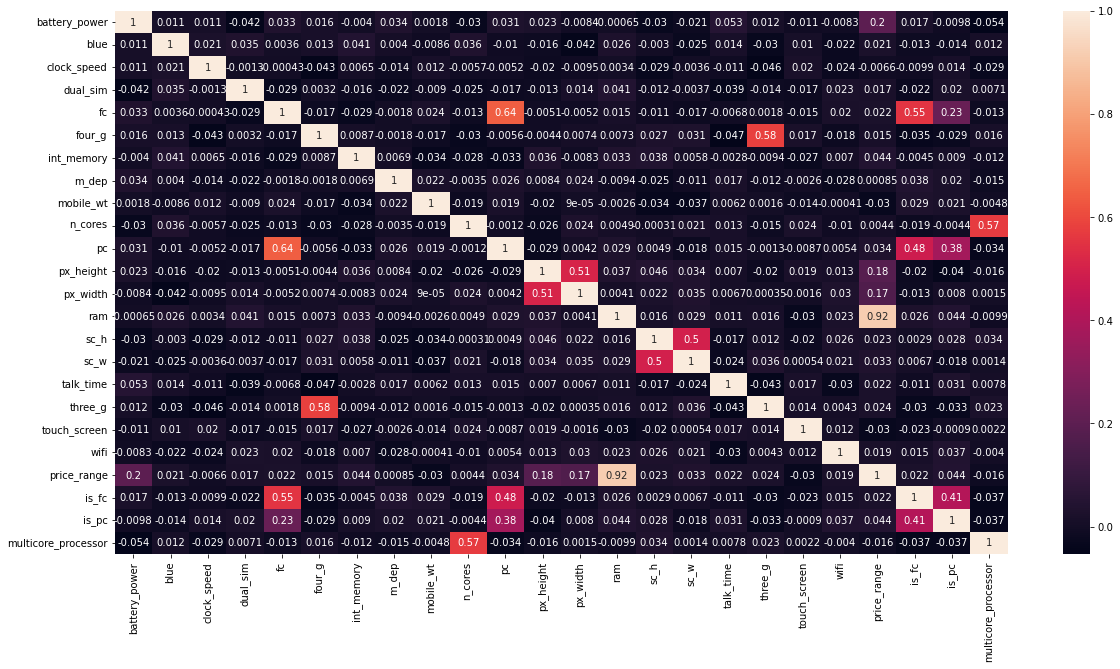

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [34]:


correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

ram                    0.917046
battery_power          0.200723
px_height              0.183910
px_width               0.165818
int_memory             0.044435
is_pc                  0.043910
pc                     0.033599
sc_w                   0.033141
three_g                0.023611
sc_h                   0.022986
is_fc                  0.022085
fc                     0.021998
talk_time              0.021859
blue                   0.020573
wifi                   0.018785
dual_sim               0.017444
four_g                 0.014772
n_cores                0.004399
m_dep                  0.000853
clock_speed           -0.006606
multicore_processor   -0.016455
mobile_wt             -0.030302
touch_screen          -0.030411
Name: price_range, dtype: float64

from this we can see that the size of a ram is highly correlated with price range 

In [35]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,multicore_processor
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,12.306500,6.335962,11.011000,0.761500,0.503000,0.507000,1.500000,0.763000,0.949500,0.879000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,4.213245,3.961097,5.463955,0.426273,0.500116,0.500076,1.118314,0.425349,0.219029,0.326209
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [36]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


In [37]:
df.blue.value_counts()

# half of the phone in the dataset doesnot have bluetooth while the other half have bluetooth

0    1010
1     990
Name: blue, dtype: int64

In [38]:
df.dual_sim.value_counts()
# half of the phone here have a dual simcard slot the other half doesn't

1    1019
0     981
Name: dual_sim, dtype: int64

In [39]:
df.fc.value_counts()
# majority of phone in this dataset have a front facing camera
# almost a quarter of the phone in this dataset doesn't have front facing camera 

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [40]:
df.n_cores.value_counts()
# most of the phones in this dataset is a multicore processor (more than 1 core processing)

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [41]:
df.pc.value_counts()


10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

In [42]:
df.talk_time.value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

In [43]:
df.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [44]:
df.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [45]:
df.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [46]:
df.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [47]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Multivariate Analysis

In [48]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


<b>Battery, Talktime, and RAM</b>

In [49]:
df.groupby('price_range')['talk_time','battery_power'].mean()

,talk_time,battery_power
price_range,,
0,10.612,1116.902
1,11.362,1228.868
2,10.972,1228.320
3,11.098,1379.984


while the battery power is somewhat positively correlated with the price range 

the higher the battery power doesn't always mean a longer talk time 

# Camera and Price Range

In [50]:
df.groupby('price_range')['fc','pc'].mean()

,fc,pc
price_range,,
0,4.084,9.574
1,4.340,9.924
2,4.498,10.018
3,4.316,10.150


higher price range has a higher megapixel on the primary camera

# Internal Memory and RAM, weight and Price Range

In [51]:
df.groupby('price_range')['int_memory', 'ram', 'mobile_wt'].mean()

,int_memory,ram,mobile_wt
price_range,,,
0,31.174,785.314,140.552
1,32.116,1679.490,140.510
2,30.920,2582.816,143.614
3,33.976,3449.232,136.320


# Touch Screen and Price Range

In [52]:
pd.crosstab(df['price_range'], df['touch_screen'], normalize = 'columns')

touch_screen,0,1
price_range,,
0,0.239437,0.260437
1,0.240443,0.259443
2,0.266600,0.233598
3,0.253521,0.246521


# Visualisation

In [53]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


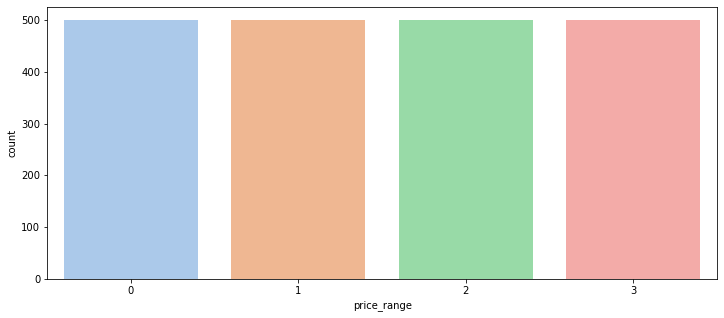

In [54]:
#price range 

plt.figure(figsize = (12, 5))
sns.countplot(df['price_range'], palette = 'pastel')
plt.show()

there are 500 phones in each price_range

Text(0.5, 1.0, 'RAM distribution of price range 3')

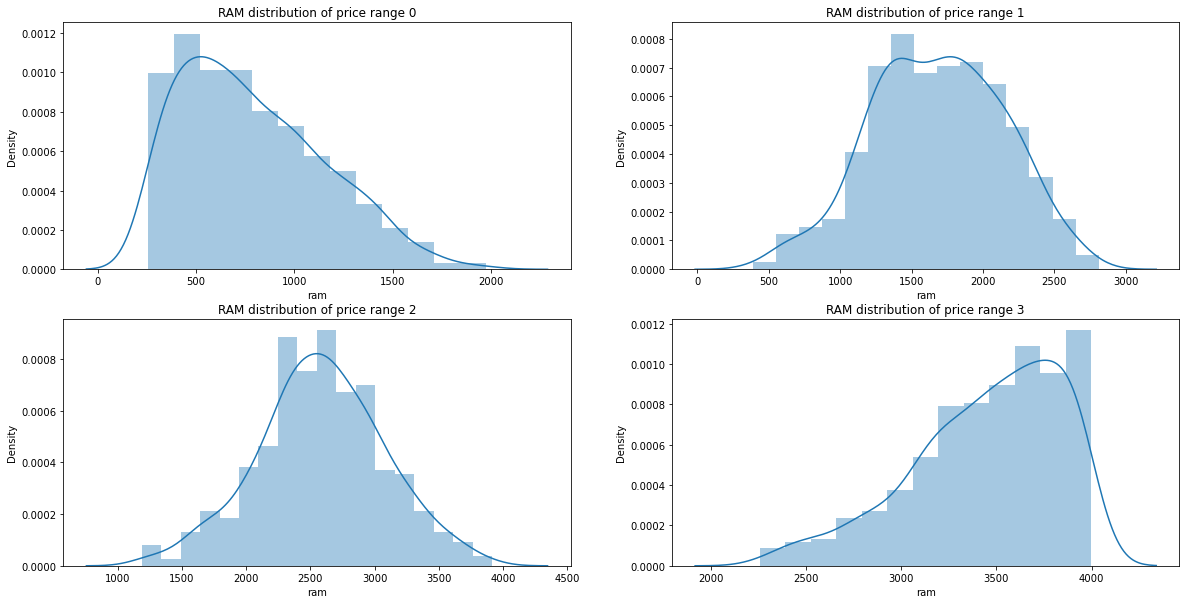

In [55]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'])
plt.title('RAM distribution of price range 3')

for the the price range 0 majority of the phone are in range of 400 - 700 mb RAM, and the max is around 2000 mb

for  price range 1 ranging from 500 - 3000 with the highest distribution on RAM around 1300 - 2000mb

for the price range 2 the RAM distribution ranging  from 1000 - 4000 mb with the highest distribution around 2500mb

for the highest price range 3 the ram range from 2000mb to - 4000 mb with the highest distribution around 4000 mb

# Battery

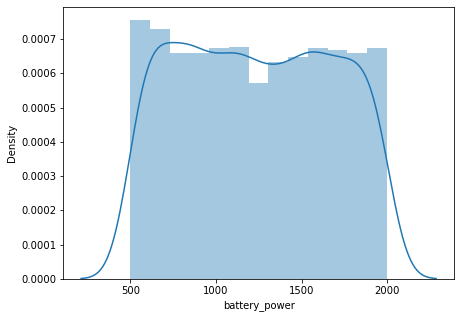

In [56]:
plt.figure(figsize = (7, 5))
sns.distplot(df['battery_power'])
plt.show()

Text(0.5, 1.0, 'battery distribution of price range 3')

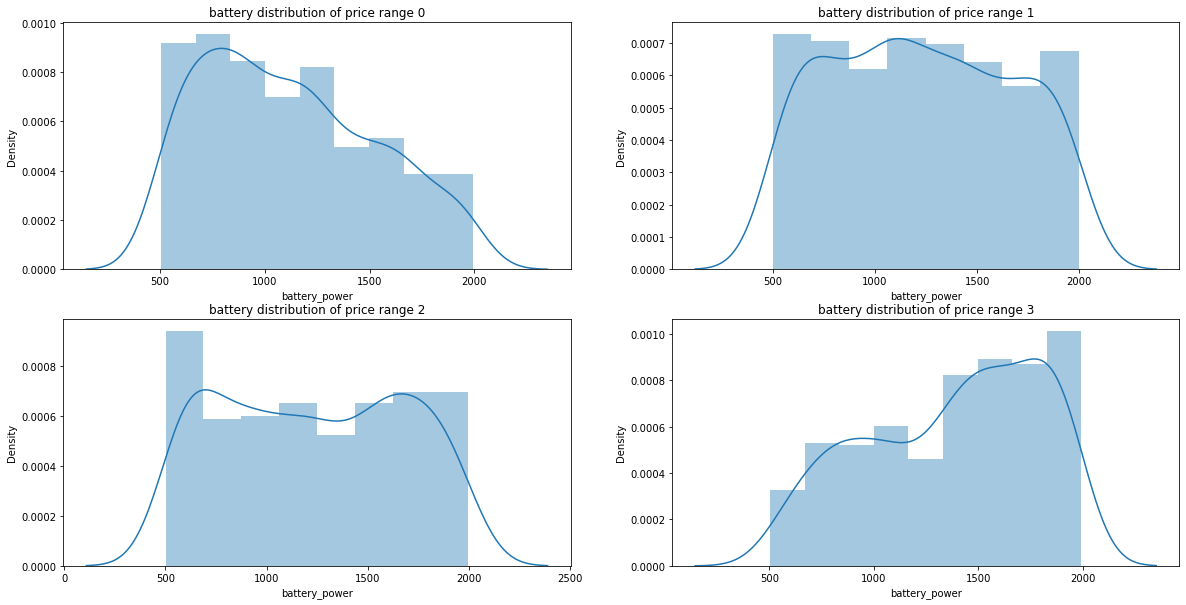

In [57]:


plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['battery_power'])
plt.title('battery distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['battery_power'])
plt.title('battery distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['battery_power'])
plt.title('battery distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['battery_power'])
plt.title('battery distribution of price range 3')

we can see that the pricerange 0 has more lower power battery product compared to other price range since the distribution  is somehow right skewed 

# Pixel Height and Width

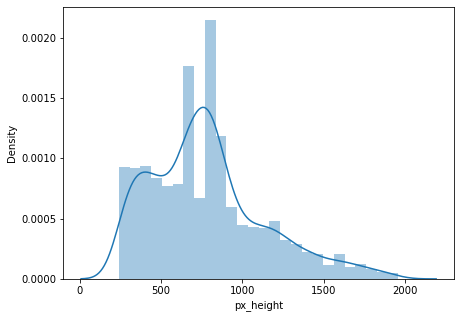

In [58]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_height'])
plt.show()

Text(0.5, 1.0, 'Pixel Height distribution of price range 3')

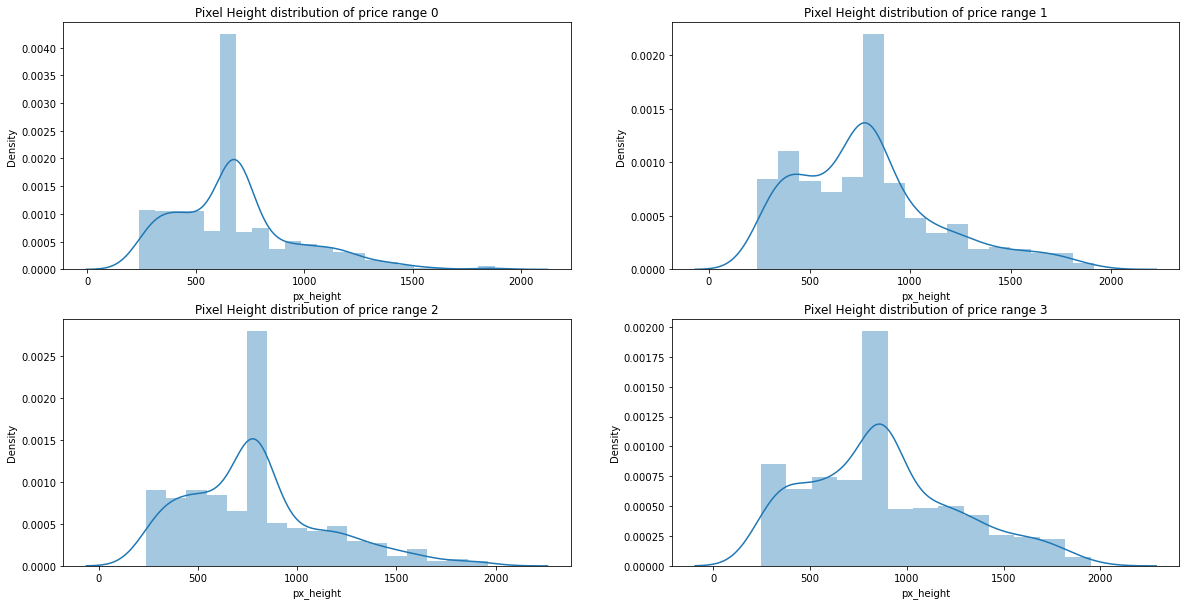

In [59]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_height'])
plt.title('Pixel Height distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_height'])
plt.title('Pixel Height distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_height'])
plt.title('Pixel Height distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_height'])
plt.title('Pixel Height distribution of price range 3')

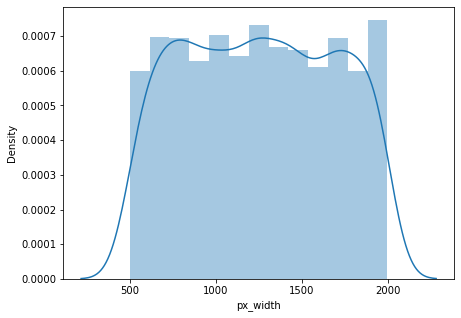

In [60]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_width'])
plt.show()

Text(0.5, 1.0, 'Pixel Width distribution of price range 3')

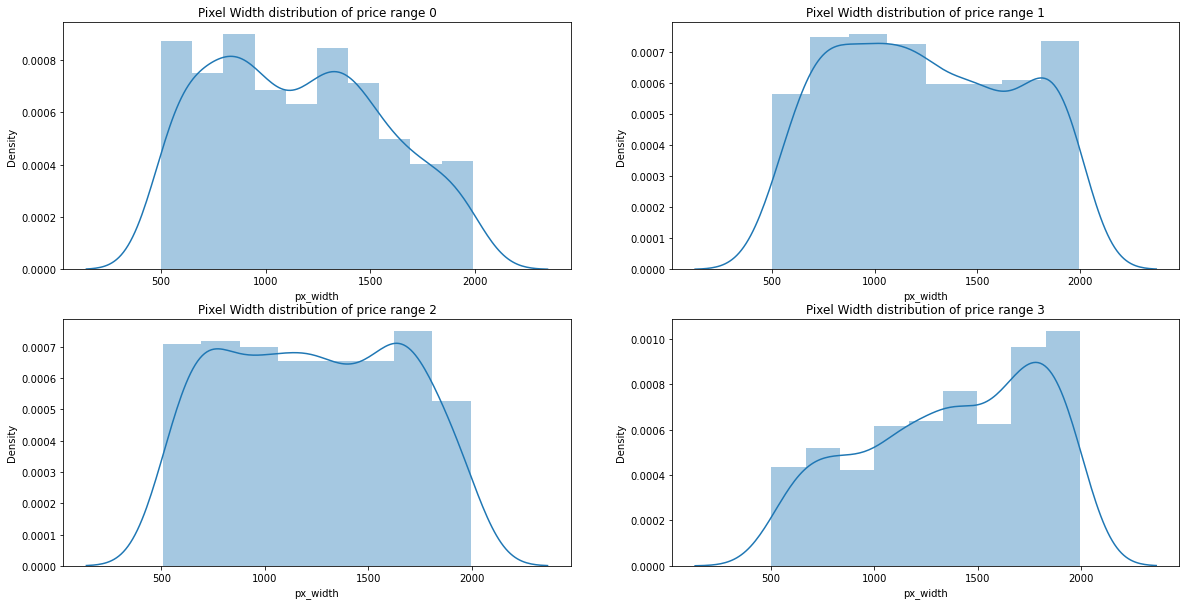

In [61]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_width'])
plt.title('Pixel Width distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_width'])
plt.title('Pixel Width distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_width'])
plt.title('Pixel Width distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_width'])
plt.title('Pixel Width distribution of price range 3')

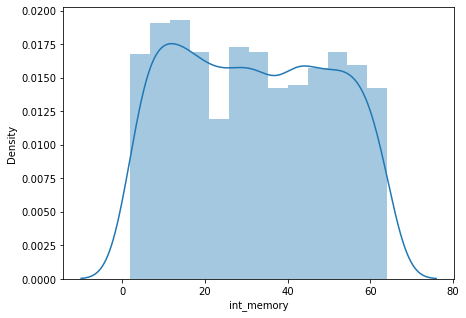

In [62]:
plt.figure(figsize = (7, 5))
sns.distplot(df['int_memory'])
plt.show()

Text(0.5, 1.0, 'Internal memory distribution of price range 3')

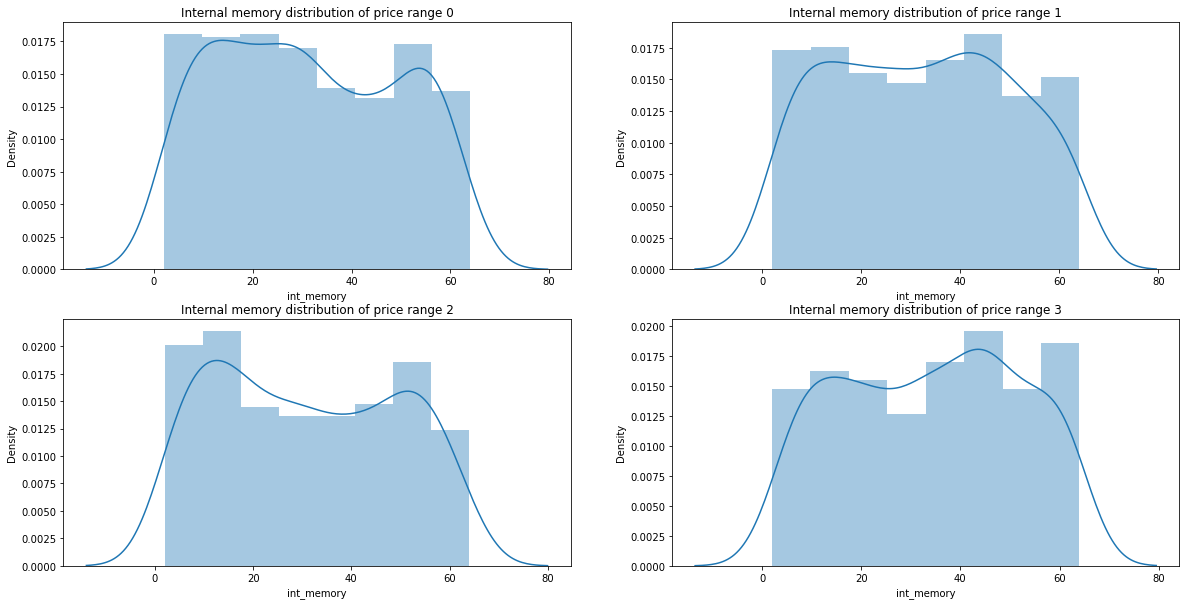

In [63]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['int_memory'])
plt.title('Internal memory distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['int_memory'])
plt.title('Internal memory distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['int_memory'])
plt.title('Internal memory distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['int_memory'])
plt.title('Internal memory distribution of price range 3')

<AxesSubplot:xlabel='four_g', ylabel='count'>

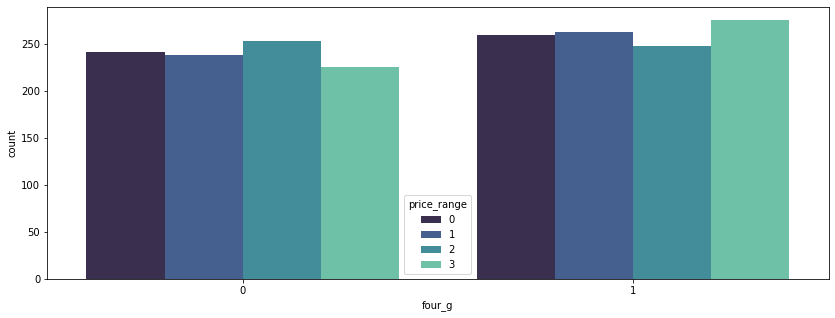

In [64]:
plt.figure(figsize = (14, 5))
sns.countplot(df['four_g'], palette = 'mako', hue = df['price_range'])

<AxesSubplot:xlabel='three_g', ylabel='count'>

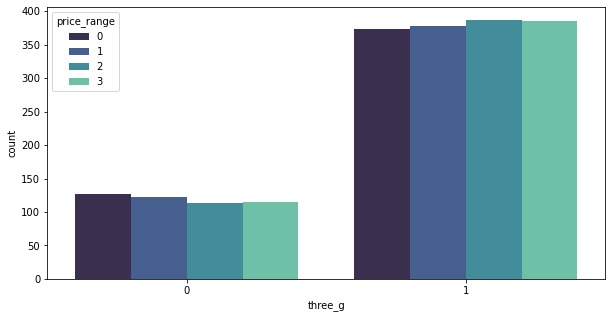

In [65]:
plt.figure(figsize = (10, 5))
sns.countplot(df['three_g'], palette = 'mako', hue = df['price_range'])

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

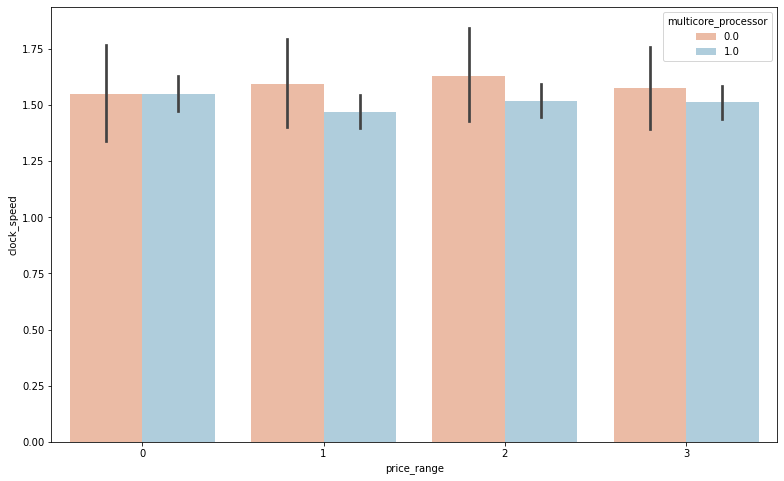

In [66]:
# Processor and price Range

plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['clock_speed'], hue= df['multicore_processor'], palette = 'RdBu')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

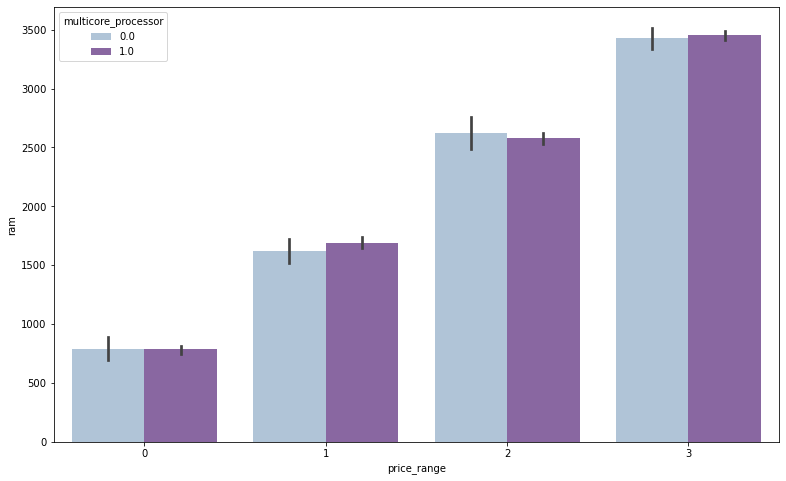

In [67]:
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['multicore_processor'], palette = 'BuPu')

# Multivariate Visualisation

since from our analysis before we found out that RAM has the highest correlation for price range we are going to visualize independet variable with ram and price range

In [68]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,is_fc,is_pc,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,1.0,1.0,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


<b>Battery Power Ram and Price Range</b>

<AxesSubplot:xlabel='ram', ylabel='battery_power'>

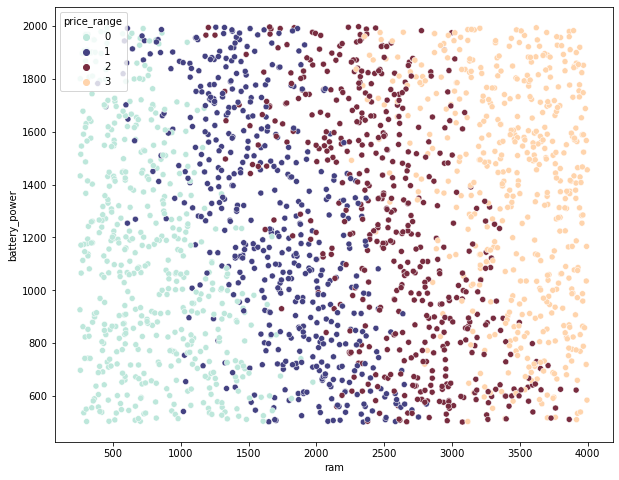

In [69]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['battery_power'], hue = df['price_range'], palette = 'icefire')

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

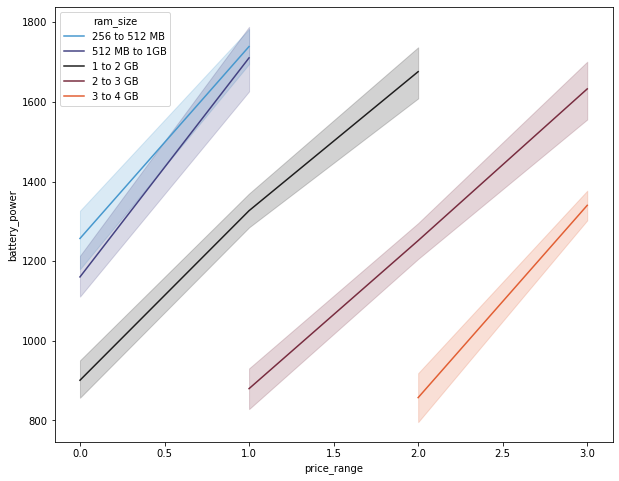

In [70]:
plt.figure(figsize = (10, 8))
sns.lineplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'icefire')

# phone with price range 3 more likely to have a higher battery power compared to phone in price 
# range 1 and 2 

<b>Ram, Price and Processor</b>

<AxesSubplot:xlabel='price_range', ylabel='ram'>

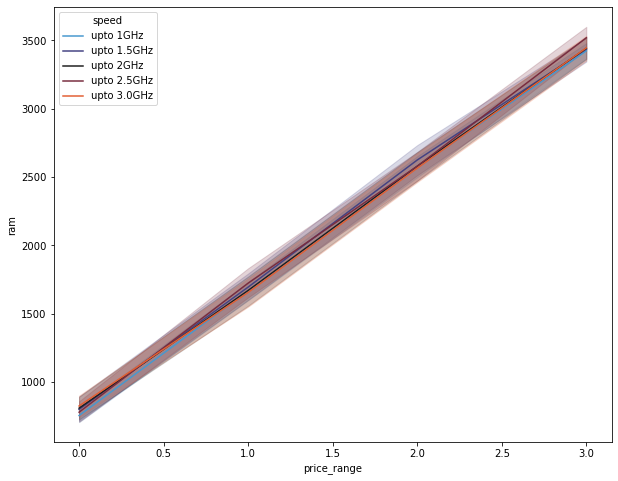

In [71]:
#clock speed and ram

plt.figure(figsize = (10, 8))
sns.lineplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'icefire')

# from this plot below we see many overlapping that even with small ram it's possible to have
# up to 3 GHz clock speed



<AxesSubplot:xlabel='n_cores', ylabel='ram'>

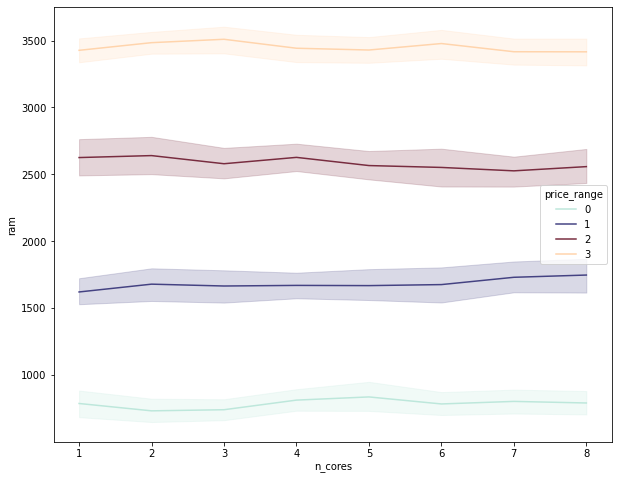

In [72]:
# number of cores ram and price range 

plt.figure(figsize = (10, 8))
sns.lineplot(df['n_cores'], df['ram'], hue = df['price_range'], palette = 'icefire')

# this graph below shows that number of cores could vary in different size of ram
# you could have many cores and low ram
# or high ram with low number of cores 

# the only things that seems to affect the price is ram here

# from each number of cores the graphic looks the same means you could have phone in price range 0 
# with 8 number of cores or phone with price range of 3 with 1 core

<AxesSubplot:xlabel='multicore_processor', ylabel='ram'>

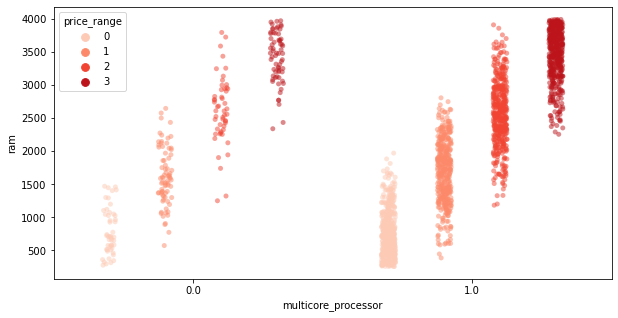

In [73]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['multicore_processor'], df['ram'], hue = df['price_range'], dodge=True, alpha = 0.5, \
             palette = 'Reds')

# Bluetooth Ram and price range

<AxesSubplot:xlabel='blue', ylabel='ram'>

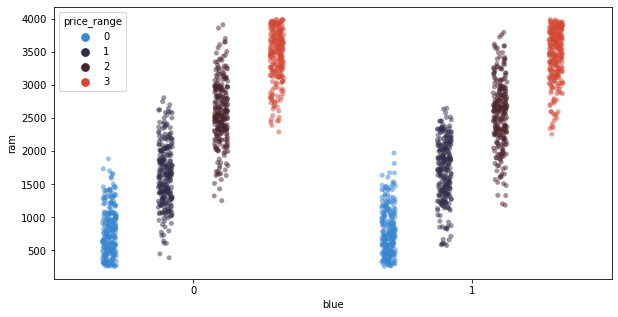

In [74]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['blue'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'icefire')

# Dual sim, price and Ram

<AxesSubplot:xlabel='dual_sim', ylabel='ram'>

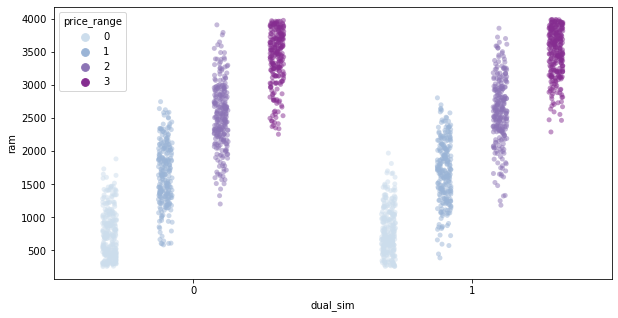

In [75]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['dual_sim'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')


<AxesSubplot:xlabel='dual_sim', ylabel='count'>

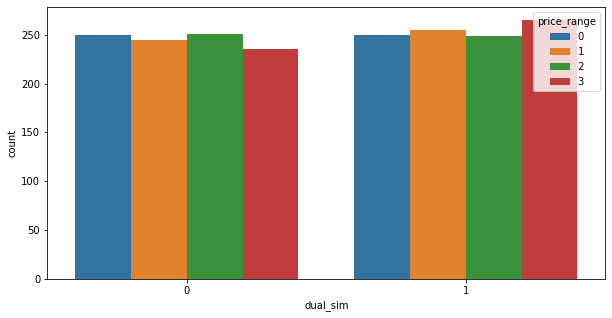

In [76]:
plt.figure(figsize = (10, 5))

sns.countplot(df['dual_sim'], hue = df['price_range'])

<AxesSubplot:xlabel='dual_sim', ylabel='ram'>

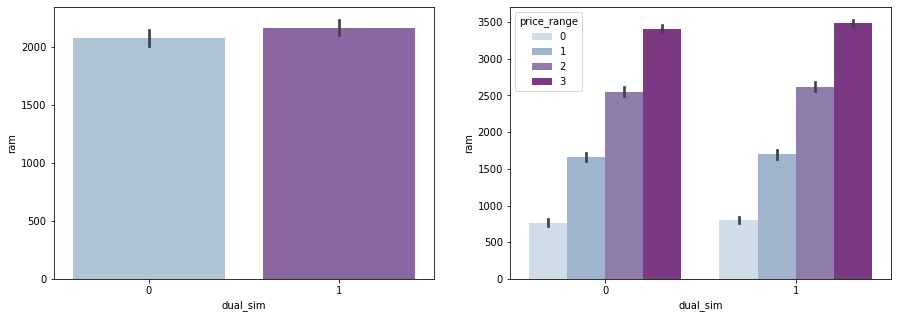

In [77]:


plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(df['dual_sim'], y = df['ram'], palette = 'BuPu')

plt.subplot(1,2,2)
sns.barplot(df['dual_sim'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')

# Memory and Ram, Price

<AxesSubplot:xlabel='ram', ylabel='int_memory'>

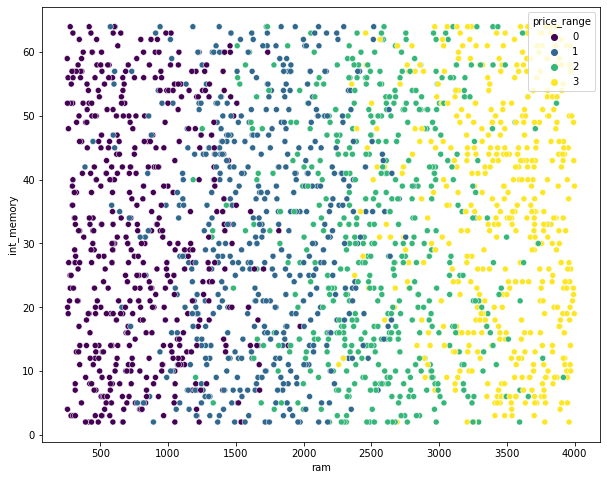

In [78]:


plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['int_memory'], hue = df['price_range'], palette = 'viridis')

# number of memory and ram itseems doesn't have any correlation between each other 



<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

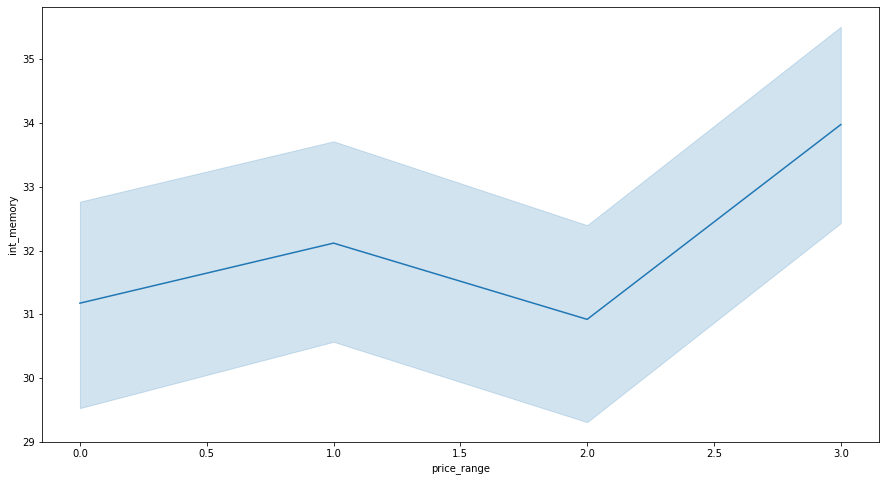

In [79]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['int_memory'], palette = 'icefire')



from price range 0 to 1 there's a slight increase in memory sizes 

from price range 1 to 2 there's a descrease in memory sizes 

while for the most expensive price range we see a major sharp incline in memory sizes 


<b>Cameras</b>

Primary Camera


<AxesSubplot:xlabel='is_pc', ylabel='count'>

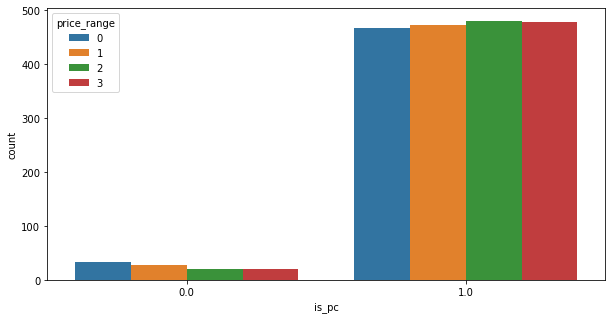

In [80]:


plt.figure(figsize = (10, 5))

sns.countplot(df['is_pc'], hue = df['price_range'])

In [81]:
# there's very low number of phone without back camera (primary camera)
# phone with 0 price range has the highest number of no primary camera

<AxesSubplot:xlabel='is_pc', ylabel='ram'>

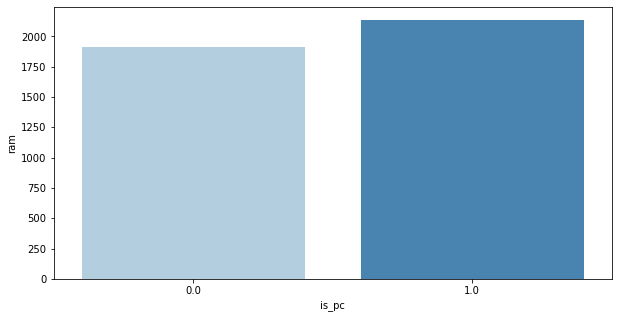

In [82]:
plt.figure(figsize = (10, 5))

sns.barplot(df['is_pc'], df['ram'], ci = False, palette = 'Blues')

phone without primary camera has lower average ram compared to phone that has primary camera .This might be because phone with no camera majority are in price range 0 which is has a lower avg ram compared to the rest of the group 

<b>Front Camera</b>

<AxesSubplot:xlabel='is_fc', ylabel='count'>

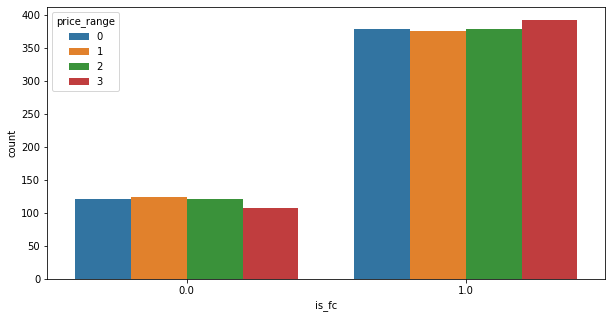

In [83]:
plt.figure(figsize = (10, 5))

sns.countplot(df['is_fc'], hue = df['price_range'])

<AxesSubplot:xlabel='price_range', ylabel='fc'>

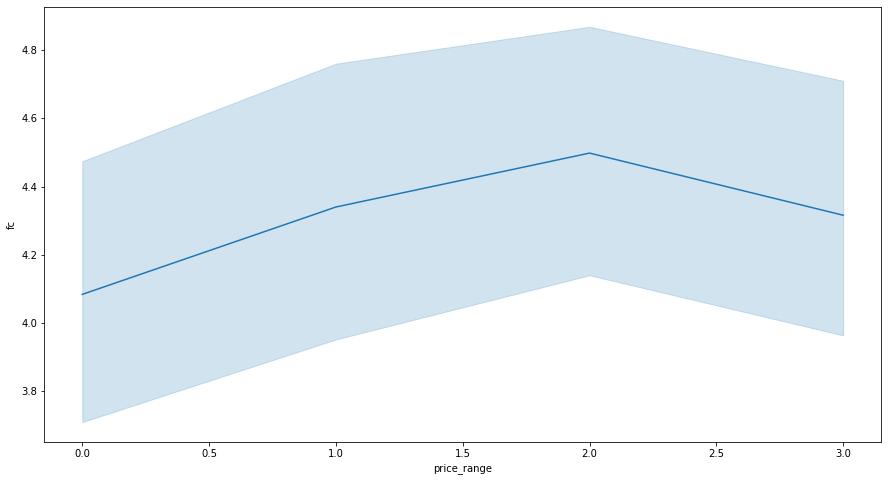

In [84]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['fc'], palette = 'mako')

we can see that there's a slightly increase in average primary camera megapixel when the price range increase 

# Conclusion



    RAM Size the more expensive phone (higher price range) has a higher RAM size. From our analysis we found out that the higher the price range the higher the minimum ram size for phones

    Battery Power for the battery power the min battery power of all phone price range are around 500 mAh, and the maximum battery power of all price range is around 2000 mAh. However the the average battery power keep increasing in general as the price range goes up.and from our analysis the distribution of battery power for phone that's in the higher price range are slight left skewed compared to the phone with the lower price range (price range 1 & 0) are slightly right skewed

    PX height & PX width pixel height and pixel width are the determinant factor when it comes to screen quality and in this case the height and the width play a role when it comes to determining a price of a phone range, for the pixel width it shows that phone that's in a higher price range has a higher pixel width. however for the pixel width the distribution kind of looks similar for phone in all price range
    
    
    Camera Megapixel and Price Rangeby looking at the table above we can see that for the primary camera (back camera) the average megapixel is somehow positively correlated with the price range , as the average megapixel get higher as the price range get more expensive.However for the front camera the size of the megapixel doesn't really have any positive or negative correlation to the price range
